In [21]:
from models import Calculator, createFromBenchmark
from utils import *
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
# a file for creating datasets, only needs to be run once in order to create the set.Saves time later

calc = Calculator()
filename = '/Users/ane/Projects/Performance Engineering/mini_project_4/benchmarks/benchmark_4.txt'
problem = createFromBenchmark(filename)

# Testing out different regression models

Now, it is clear that assessing the score of each candidate schedule has a high computation cost.
By caching schedules (Task 11.) we avoid unnecessary recalculations. It remains that it would be
interesting to “guess” the score of a schedule, in order to eliminate without assessing schedules
whose score is bad compared to the one of the current best candidate. Hence the idea to use
machine learning. Guessing the score of a schedule is actually a typical regression problem:
– Each point in the data set is a schedule.
– The list of attributes is the list of job numbers chararcterizing the schedule.
– The label is the score of the schedule.
For instance, the schedule ⟨1, 2, 3, 1, 2, 3, 1, 3⟩ has the score 8. The idea is thus to draw at random
a set of schedules, to calculate the score of each of them, and then to study the performance of
regression algorithms on these instances.

We  have tried out two  different regression models: Random forest and Decision tree

## Creating a dataset for training
We are testing out different regression models based on data from benchmark_4.txt assuming that this problem is sufficiently big enough.

Creating the dataset and calculating the timespan for  every schedule takes time, therefore we decided to save the data in a .csv file

In [22]:
schedules = getAllSchedules(problem, set_size=3000) # assuming 3000 rows is big enough for the regression algorithm
print('Length schedules: ', len(schedules))

new_schedules = []

for schedule in schedules:
    temp = []
    for job_id, index in schedule:
        temp.append(job_id)
    new_schedules.append(temp)

print('len new_schedule: ', len(new_schedules))

# appending the result to each schedule

for i in range(len(schedules)):
    print('calculating schedule: ', i)
    timespan = calc.totalOperationTime(problem, schedules[i])
    new_schedules[i].append(timespan)

print('len new_schedule: ', len(new_schedules))
columns = []
for i in range(len(new_schedules[0]) -1):
    columns.append(str(i + 1))
columns.append('result')


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/ane/Projects/Performance Engineering/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3397, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/9w/xmv0pp696b3dv7bw9rk02fb40000gn/T/ipykernel_14244/1306383035.py", line 1, in <cell line: 1>
    schedules = getAllSchedules(problem, set_size=3000) # assuming 3000 rows is big enough for the regression algorithm
  File "/Users/ane/Projects/Performance Engineering/mini_project_4/utils.py", line 113, in getAllSchedules
  File "/Users/ane/Projects/Performance Engineering/mini_project_4/utils.py", line 38, in createMixedSchedule
    schedule.append(job_schedule.pop(0))
IndexError: pop from empty list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/ane/Projects/Performance Engineering/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1992, in showtr

In [23]:
df = pd.DataFrame(new_schedules, columns=columns)
print(df)
df.to_csv('../mini_project_4/dataframes/dataframe_6.csv', index=False)

      1  2  3  4  5  6  7  8  9  10  ...  56  57  58  59  60  61  62  63  64  \
0     1  1  1  1  1  1  1  1  2   2  ...   7   8   8   8   8   8   8   8   8   
1     1  1  1  1  1  1  1  2  1   2  ...   7   8   8   8   8   8   8   8   8   
2     1  1  1  1  1  1  1  2  2   1  ...   7   8   8   8   8   8   8   8   8   
3     1  1  1  1  1  1  1  2  2   2  ...   7   8   8   8   8   8   8   8   8   
4     1  1  1  1  1  1  1  2  2   2  ...   7   8   8   8   8   8   8   8   8   
...  .. .. .. .. .. .. .. .. ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..  ..   
3022  3  4  5  6  7  8  1  2  3   4  ...   2   3   4   5   2   6   7   8   1   
3023  3  4  5  6  7  8  1  2  3   4  ...   2   3   4   5   6   2   7   8   1   
3024  3  4  5  6  7  8  1  2  3   4  ...   2   3   4   5   6   7   2   8   1   
3025  3  4  5  6  7  8  1  2  3   4  ...   2   3   4   5   6   7   8   2   1   
3026  3  4  5  6  7  8  1  2  3   4  ...   2   3   4   5   6   7   8   1   2   

      result  
0        286  
1        

In [24]:
schedules = pd.read_csv('../mini_project_4/dataframes/dataframe_6.csv')
print(schedules.loc[schedules['result'] == schedules['result'].min()])

      1  2  3  4  5  6  7  8  9  10  ...  56  57  58  59  60  61  62  63  64  \
2217  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2218  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2219  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2220  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2221  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2222  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2223  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   
2224  5  6  7  8  1  2  3  4  5   6  ...   5   7   2   6   4   8   1   2   3   

      result  
2217     109  
2218     109  
2219     109  
2220     109  
2221     109  
2222     109  
2223     109  
2224     109  

[8 rows x 65 columns]


# Random Forest

In [25]:
dataset = pd.read_csv('../mini_project_4/dataframes/dataframe_6.csv')

X = dataset.iloc[:, 0:64]
y = dataset.iloc[:, -1]

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [26]:
# fit
forest_regressor1 = RandomForestRegressor(n_estimators = 300, random_state = 0)
forest_regressor1.fit(X_train.values, y_train.values)

RandomForestRegressor(n_estimators=300, random_state=0)

In [27]:
# predict and calculate score
prediction = forest_regressor1.predict(X_test)

scoref1 = forest_regressor1.score(X_test, y_test, sample_weight=None)
print('Score f1: ', scoref1)

Score f1:  0.9960817942057767


/Users/ane/Projects/Performance Engineering/env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/Users/ane/Projects/Performance Engineering/env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


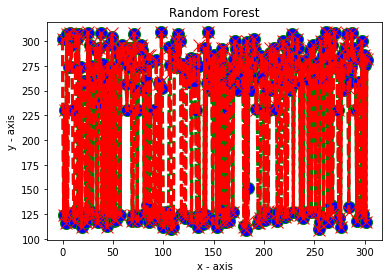

In [28]:
# plot
# x axis values
x = [i for i in range(len(prediction))]
# corresponding y axis values
y = prediction


# plotting the points
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

# line 2 points
x2 = x
y2 = y_test
# plotting the line 2 points
plt.plot(x2, y2, color='red', linestyle='dashed', linewidth = 3,
         marker='x', markerfacecolor='blue', markersize=12)
 
# setting x and y axis range
# plt.ylim(1,8)
# plt.xlim(1,8)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Random Forest')
 
# function to show the plot
plt.show()

# Decision Tree

In [29]:
tree_regressor1 = DecisionTreeRegressor(random_state = 0)
tree_regressor1.fit(X_train.values, y_train.values)

DecisionTreeRegressor(random_state=0)

In [30]:
prediction = tree_regressor1.predict(X_test)

scoret1 = tree_regressor1.score(X_test, y_test, sample_weight=None)
print('Score Tree Regressor1: ', scoret1)

Score Tree Regressor1:  0.9982974540626627


/Users/ane/Projects/Performance Engineering/env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/Users/ane/Projects/Performance Engineering/env/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


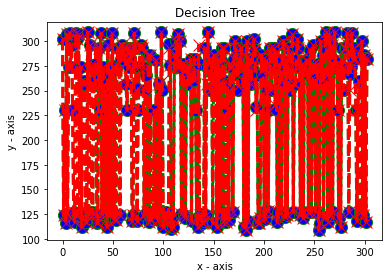

In [31]:
# x axis values
x = [i for i in range(len(prediction))]
# corresponding y axis values
y = prediction


# plotting the points
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)

# line 2 points
x2 = x
y2 = y_test
# plotting the line 2 points
plt.plot(x2, y2, color='red', linestyle='dashed', linewidth = 3,
         marker='x', markerfacecolor='blue', markersize=12)
 
# setting x and y axis range
# plt.ylim(1,8)
# plt.xlim(1,8)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Decision Tree')
 
# function to show the plot
plt.show()


We  can see that the decision tree is a little bit better than the random forest model